In [88]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
random.seed = 69

In [89]:
def egreedy(s, Q, epsilon):
    vals = Q[s]
    inds = vals!= np.ma.masked
    acts = np.array([0, 1, 2, 3])
    acts = acts[inds]
    p = np.random.rand()
    
    if p < epsilon:
        u = np.random.choice(acts, 1)
        return u[0]
    else:
        return np.argmax(vals)

def learn(Q, s, s_prime, a, envt, lr, gamma):
    pred = Q[s, a]
    targ = envt[s_prime] - 2 + gamma*np.max(Q[s_prime]) # s or s_prime
    Q[s, a] = Q[s, a] + lr*(targ - pred)
    return Q

def makeEnvt(M, N):
    envt = np.zeros(N**2)
    holes = random.sample(range(1, N**2-1), M)
    for i in range(N**2):
        if i in holes:
            envt[i] = -100
    envt[N**2 - 1] = 100
    return envt

def play(Q, envt, lr, gamma, epsilon, N):
    s = 0
    tot_rew = 0
    steps = 0
    while (s != N**2 - 1):
        steps = steps + 1
        a = egreedy(s, Q, epsilon)
#         print("state = ",s, "action = ", a)
        if a == 0:
            s_prime = s - N
        elif a == 1:
            s_prime = s + 1
        elif a == 2:
            s_prime = s + N
        else:
            s_prime = s - 1
        # print(s, a, s_prime)
        tot_rew += envt[s_prime]
        Q = learn(Q, s, s_prime, a, envt, lr, gamma)
        s = s_prime

        # diffs.append(calc_diff(Q_new, Q_old))
    return Q, tot_rew, steps



Please scroll through the entire output box of the next cell.

[[   0.    0.    0. -100.]
 [   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [-100. -100.    0.  100.]]


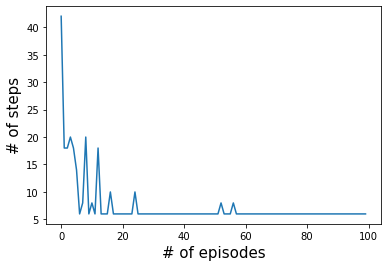

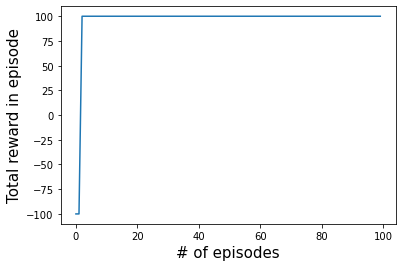

In [90]:
N = 4
M = 3
lr = 0.06
gamma = 0.99
epsilon = 0.01
rews = []

envt = np.genfromtxt('env.csv', delimiter = ',')
# envt = makeEnvt(M, N)
print(np.reshape(envt, (N, N)))
rewards = []
for u in range(1):
    Q = np.ma.zeros((N**2, 4))
    for i in range(N**2):
        if i%N == 0:                       # move left
            Q[i,3] = np.ma.masked
        if (i+1)%N == 0:             # move right
            Q[i,1] = np.ma.masked
        if i < N:                       # move up
            Q[i,0] = np.ma.masked
        if i >= N*(N-1):                     # move down
            Q[i,2] = np.ma.masked        
    rews = []
    steps = []
    episodes = 100
    for t in range(episodes):
#         print(u,t)
        Q, rew, step = play(Q, envt, lr, gamma, epsilon, N)
        rews.append(rew)
        steps.append(step)
    rewards.append(rews)

rewards = np.array(rewards)
rewards = np.mean(rewards, 0)
plt.plot(range(episodes), steps)
plt.xlabel('# of episodes', fontsize = 15)
plt.ylabel('# of steps', fontsize = 15)

plt.figure()
plt.plot(rewards)
plt.xlabel('# of episodes', fontsize = 15)
plt.ylabel('Total reward in episode', fontsize = 15)


plt.show()


In [81]:
steps[-5:]

[6, 6, 8, 6, 8]

The side length is represented by N, and the number of holes by M. The starting point is top-left and the goal is bottom-right. Each hole offers a reward of -100 and the goal offers +100. Rest offers zero. An illustration for N = 4, M = 5 has been added. 
The learning curve of the Q-learning algorithms is a rewards by number of episodes plot. It depicts the change in reward for every episode of going from start to goal of the lake. I use 20 episodes for the above illustration.

In [82]:
Q

masked_array(
  data=[[--, -1.5352632578367273, -1.526919415271287, --],
        [--, -0.8981230843694545, -0.9009591353277082,
         -0.8997831138113529],
        [--, -1.02, -0.4623633566008748, -0.485975944009445],
        [--, --, -0.02, -0.02],
        [-0.9216564786183286, -0.9010159669854961, -0.9058559712178313,
         --],
        [-0.5039231330913854, -0.4877866800523432, -0.40853326440070437,
         -0.5060738218220373],
        [-0.16300775665796388, -0.16647149566814287, 2.2905660039135385,
         -0.16435897520518752],
        [-1.02, --, 0.5448079787014426, -0.0401959802],
        [-0.5256536201125059, -0.47658745815449977, -2.0298, --],
        [-0.2239476689602192, 3.5024514334426153, -1.02,
         -0.22523300439869015],
        [-0.039998000000000006, 23.423241257854894, -0.0398,
         -0.040591881794],
        [-0.02, --, 61.4005005154816, 0.0],
        [-0.020198, -1.02, --, --],
        [-0.02, -0.010298, --, 0.0],
        [-0.02, 1.9502, --, 0.0],
  

In [18]:
rewards = np.mean(rewards, 0)

In [19]:
rewards

array([-1500.,     0.,   100.,   100.,   100.,   100.,   100.,   100.,
         100.,   100.])

In [ ]:
gammas = np.linspace(0.2, 1, 5)
alphas = np.linspace(0.2, 1, 5)
N = 4
M = 6
epsilon = 0.1
fin_rewards = []
envt = makeEnvt(M, N)
fin_rewards = []

for alpha in np.nditer(alphas):
    for gamma in np.nditer(gammas):
        rewards = []
        for u in range(50):
            Q = np.ma.zeros((N**2, 4))
            for i in range(N**2):
                if i%N == 0:
                    Q[i,3] = np.ma.masked
                if (i+1)%N == 0:
                    Q[i,1] = np.ma.masked
                if i < N:
                    Q[i,0] = np.ma.masked
                if i >= N*(N-1):
                    Q[i,2] = np.ma.masked        
            rews = []
            for t in range(30):
                print(u,t, gamma, alpha)
                Q, rew = play(Q, envt, alpha, gamma, epsilon, N)
                rews.append(rew)
            rewards.append(rews)
        rewards = np.array(rewards)
        fin_rewards.append(np.mean(rewards,0))

Streaming output truncated to the last 5000 lines.
33 10 0.4 1.0
33 11 0.4 1.0
33 12 0.4 1.0
33 13 0.4 1.0
33 14 0.4 1.0
33 15 0.4 1.0
33 16 0.4 1.0
33 17 0.4 1.0
33 18 0.4 1.0
33 19 0.4 1.0
33 20 0.4 1.0
33 21 0.4 1.0
33 22 0.4 1.0
33 23 0.4 1.0
33 24 0.4 1.0
33 25 0.4 1.0
33 26 0.4 1.0
33 27 0.4 1.0
33 28 0.4 1.0
33 29 0.4 1.0
34 0 0.4 1.0
34 1 0.4 1.0
34 2 0.4 1.0
34 3 0.4 1.0
34 4 0.4 1.0
34 5 0.4 1.0
34 6 0.4 1.0
34 7 0.4 1.0
34 8 0.4 1.0
34 9 0.4 1.0
34 10 0.4 1.0
34 11 0.4 1.0
34 12 0.4 1.0
34 13 0.4 1.0
34 14 0.4 1.0
34 15 0.4 1.0
34 16 0.4 1.0
34 17 0.4 1.0
34 18 0.4 1.0
34 19 0.4 1.0
34 20 0.4 1.0
34 21 0.4 1.0
34 22 0.4 1.0
34 23 0.4 1.0
34 24 0.4 1.0
34 25 0.4 1.0
34 26 0.4 1.0
34 27 0.4 1.0
34 28 0.4 1.0
34 29 0.4 1.0
35 0 0.4 1.0
35 1 0.4 1.0
35 2 0.4 1.0
35 3 0.4 1.0
35 4 0.4 1.0
35 5 0.4 1.0
35 6 0.4 1.0
35 7 0.4 1.0
35 8 0.4 1.0
35 9 0.4 1.0
35 10 0.4 1.0
35 11 0.4 1.0
35 12 0.4 1.0
35 13 0.4 1.0
35 14 0.4 1.0
35 15 0.4 1.0
35 16 0.4 1.0
35 17 0.4 1.0
35 18 0.4 1.0
35 

For each combination of alpha and gamma, I used 50 simulations of 30 episodes each and averaged the rewards of those 50 simulations.

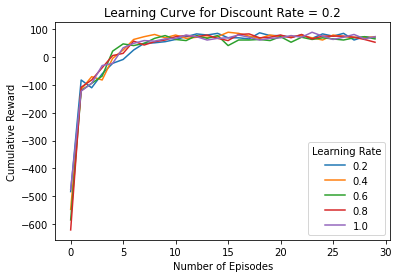

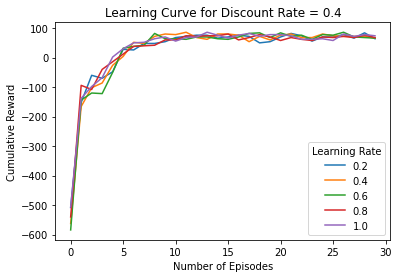

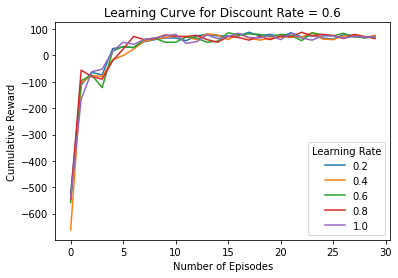

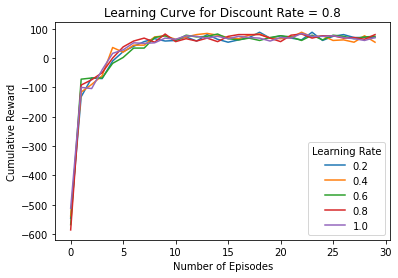

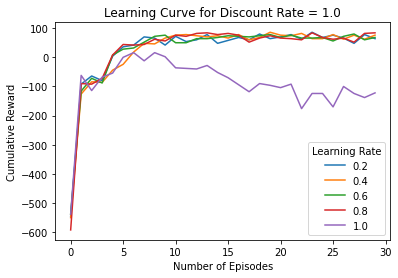

In [ ]:
fin_rewards = np.array(fin_rewards)
for j in range(0,5):
    for i in range(j, 25, 5):
        plt.plot(fin_rewards[i])
    plt.title('Learning Curve for Discount Rate = ' + str(np.around(gammas[j], 2)))
    plt.legend(np.around(alphas, 2), title = 'Learning Rate')
    plt.ylabel('Cumulative Reward')
    plt.xlabel('Number of Episodes')
    plt.show()

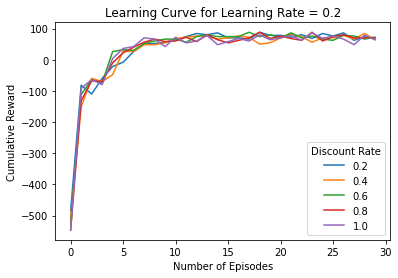

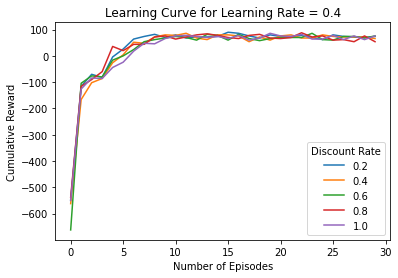

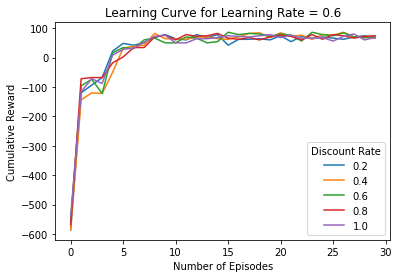

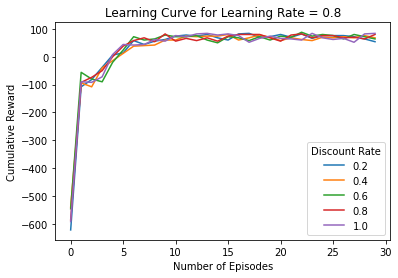

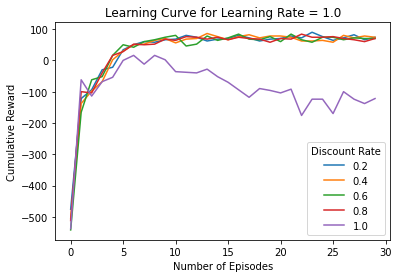

In [ ]:
for j in range(0,25,5):
    for i in range(j, j+5):
        plt.plot(fin_rewards[i])
    plt.title('Learning Curve for Learning Rate = ' + str(np.around(alphas[int(j/5)], 2)))
    plt.legend(np.around(gammas, 2), title = 'Discount Rate')
    plt.ylabel('Cumulative Reward')
    plt.xlabel('Number of Episodes')
    plt.show()

From all the plots above, no clear trend is visible about how learning performace varies with learning rate and discount rate.
Intuitively, it seems that performace shall definitely increase with increase in learning rate and discount rate. The agent learns well and can see into the future until infinity.